## IBM Machine Learning Course Lab 9 - K-Means Clustering

This is my own attempt at Lab 9 of 'Machine Learning with Python' by IBM on Coursera. It includes my own insight when solving problems. The method of analysis presented here is far more rigorous than that required by the course.

In [2]:
""" importing necessary packages """

import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

/Users/yousefnami/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


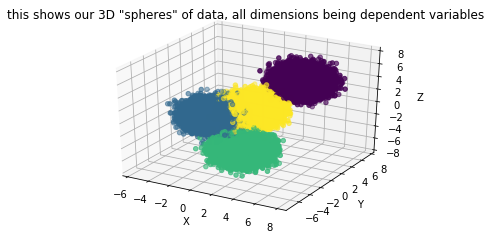

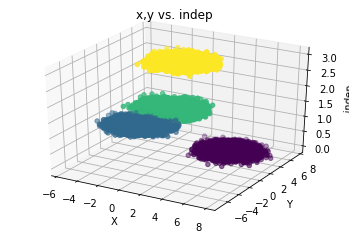

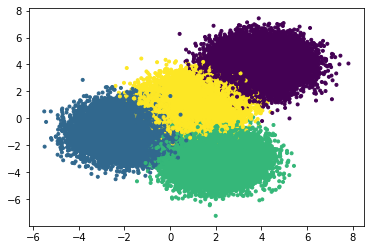

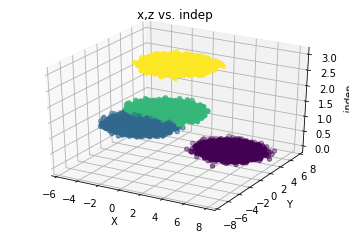

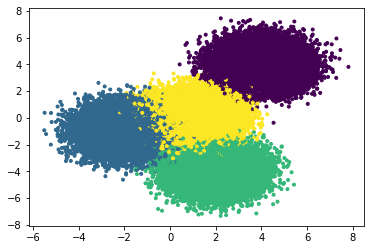

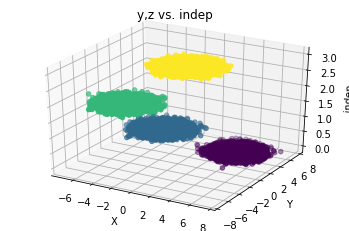

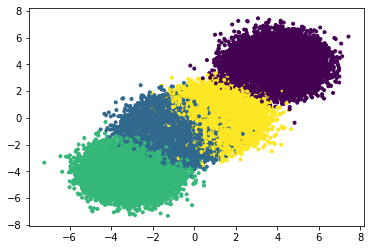

In [3]:
""" Preparation """
np.random.seed(0)

X, y = make_blobs(n_samples=100000,centers=[[4,4,4], [-2, -1,-1], [2, -3,-4], [1, 1,0]], n_features= 3, cluster_std=0.9)
#the centres essentially take x,y points... can we make it 3D?
#does not seem to work... (that woild actually be a 4 dimensional problem eh?)
#this is a practice dataset that creates X and y data sets that are 'clustered'
from mpl_toolkits.mplot3d import Axes3D
#now we have a 4 dimensional data set... let's try to visualize this!
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#colors = ['blue','yellow','green','purple']
ax.scatter(X[:,0], X[:,1], X[:,2], c=y); 
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('this shows our 3D "spheres" of data, all dimensions being dependent variables')
plt.show()
#as we can see using the 3D plot, we have 4 nice clusters: now we will try to see if we can apply K-means
#to get out cluster centres..

#X and Y vs. indep


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#colors = ['blue','yellow','green','purple']
ax.scatter(X[:,0], X[:,1], y, c=y); 
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('indep')
ax.set_title('x,y vs. indep')
plt.show()

plt.scatter(X[:, 0], X[:, 1], marker='.',c=y)
plt.show()
#X and Z vs. indep

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#colors = ['blue','yellow','green','purple']
ax.scatter(X[:,0], X[:,2], y, c=y); 
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('indep')
ax.set_title('x,z vs. indep')
plt.show()

plt.scatter(X[:, 0], X[:, 2], marker='.',c=y)
plt.show()

#Y and Z vs. indep

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#colors = ['blue','yellow','green','purple']
ax.scatter(X[:,1], X[:,2], y, c=y); 
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('indep')
ax.set_title('y,z vs. indep')
plt.show()

plt.scatter(X[:, 1], X[:, 2], marker='.',c=y)
plt.show()


#one thing that is confusing is where the cluster centres actually are!


## Data Exploration and Preparation

In [4]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means.fit(X)

k_means_labels = k_means.labels_
k_means_labels

k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 3.99075065e+00,  3.99875876e+00,  4.00096460e+00],
       [-2.00206961e+00, -9.87399370e-01, -9.96806740e-01],
       [ 1.99709207e+00, -3.00517542e+00, -3.99577883e+00],
       [ 1.00802979e+00,  1.01385704e+00, -3.78417684e-03]])

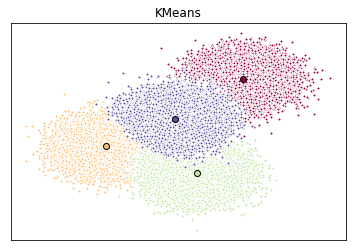

In [5]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


#this only does it for 2 dimensions, can increase it but no need as the methodoly is fairly simple


## Clustering on Real Data !

In [6]:
""" receiving and cleaning the data """
import pandas as pd
!wget -O Cust_Segmentation.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv

cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

df = cust_df.drop('Address', axis=1)
df.head()

--2020-07-29 15:26:25--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34276 (33K) [text/csv]
Saving to: ‘Cust_Segmentation.csv’

Cust_Segmentation.c 100%[===================>]  33.47K   126KB/s    in 0.3s    

2020-07-29 15:26:30 (126 KB/s) - ‘Cust_Segmentation.csv’ saved [34276/34276]



,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


         Customer Id        Age       Edu  Years Employed      Income  \
Clus_km                                                                 
0         432.006154  32.967692  1.613846        6.389231   31.204615   
1         410.166667  45.388889  2.666667       19.555556  227.166667   
2         403.780220  41.368132  1.961538       15.252747   84.076923   

         Card Debt  Other Debt  Defaulted  DebtIncomeRatio  
Clus_km                                                     
0         1.032711    2.108345   0.284658        10.095385  
1         5.678444   10.907167   0.285714         7.322222  
2         3.114412    5.770352   0.172414        10.725824  
     Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0              1   41    2               6      19      0.124       1.073   
1              2   47    1              26     100      4.582       8.218   
2              3   33    2              10      57      6.111       5.802   
3              4   29

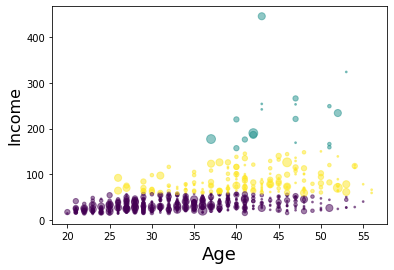

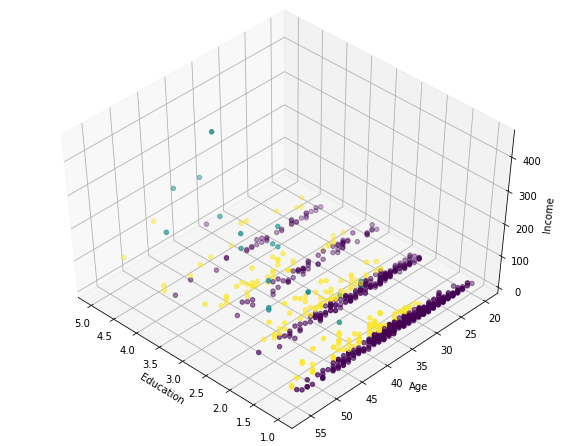

In [15]:
from sklearn.preprocessing import StandardScaler
#note, we have to scale the values so that our distance measurement can be correct!

X = df.values[:,1:] #what does this even mean... never seen this notation before
#this means: all the rows, and then columns from 1 till end!
X = np.nan_to_num(X)

Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
#print(labels)

df["Clus_km"] = labels #adds an extra column to our DF for the labels
df.head(5)

print(df.groupby('Clus_km').mean()) #this essentially creates groups for each unique value in Clus_km
#and finds the mean of all their properties
print(df)

area = np.pi * ( X[:, 1])**2  
#finds an 'area' based on the level of education 

plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
#see the power of clustering? Normally we are simply used to seeing how accurate our cluster is...
#however in this example, by using the labels generated from k_means (i.e. the actual clusters!), we are able to 
#visually show all the relevant data points, as well as which clusters they belong too..
#this is very useful stuff, especially if used for data exploratory purposes

plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()



from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))



## Conclusion

Cool that you made ur own '3D' dataset and that you applied the K means clustering method. Look back at stats notes and find out how you did it in MATLAB. Which one is better? 

Engaged with the customer example and found out how to create more powerful plots, that show multiple dimensions...

This is quite cool, interested in applying it to my own stuff

